# Pymaceuticals Inc.
---

### Observations and Insights

There is a high correlation (0.84) between a mouse's weight and the average tumor size, suggesting that the tumor grows more aggressively in heavier mice. 

Capomulin and Ramicane seem to be the most effective drug treatments based on the results. 

One outlier for Infubinol was shown. This mouse could be evaluated for underlying causes as to why the drug performed so differently in this specific case.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

#data_df = data_df.sort_values('Timepoint', ascending=True)

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = data_df['Mouse ID'].nunique()

# Show the number of mice
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint_df = data_df[['Mouse ID', 'Timepoint', 'Drug Regimen']]

# using duplicated function to find the ID of the duplicated mouse
test = timepoint_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
timepoint_df[test]

,Mouse ID,Timepoint,Drug Regimen
908,g989,0,Propriva
909,g989,0,Propriva
910,g989,5,Propriva
911,g989,5,Propriva
912,g989,10,Propriva
913,g989,10,Propriva
914,g989,15,Propriva
915,g989,15,Propriva
916,g989,20,Propriva
917,g989,20,Propriva


In [4]:
# Identified Mouse g989 as the duplicate mouse. Create new DataFrame to exclude Mouse g989
mouse_df = data_df[data_df['Mouse ID']!='g989']

# Print new DataFrame for errors
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = mouse_df['Mouse ID'].nunique()

new_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# find calculataions with groupby and functions
drug_regimen_mean = mouse_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_regimen_med = mouse_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_regimen_variance = mouse_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_regimen_std = mouse_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_regimen_sem = mouse_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# combine data into a new DataFrame
summary_df = pd.DataFrame({'mean': drug_regimen_mean, 
                           'median': drug_regimen_med, 
                          'variance': drug_regimen_variance,
                           'std': drug_regimen_std,
                          'sem': drug_regimen_sem})
# print new DataFrame
summary_df

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# use groupby to create a table
drug_regimen = mouse_df.groupby(['Drug Regimen'])

# use aggregation to recreate the summary table in a single line of code
summary_table = drug_regimen.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

# show summary table
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Treatments per Drug Regimen')

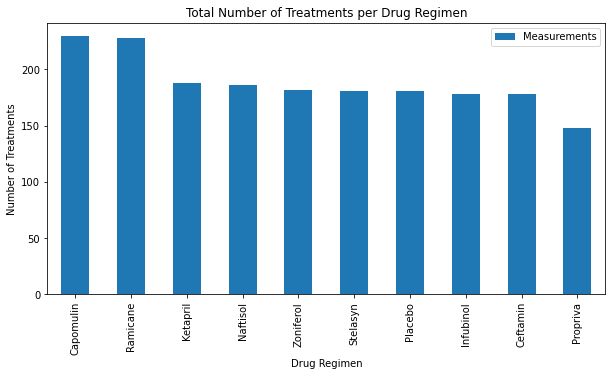

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# set up variables
drug_counts = mouse_df['Drug Regimen'].value_counts()

# create DataFrame for pandas plotting
drug_plot = pd.DataFrame({'Measurements': drug_counts})

# plot
drug_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments')
plt.title('Total Number of Treatments per Drug Regimen')

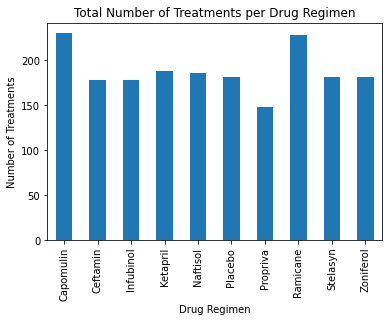

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
total_measurements = mouse_df.groupby(['Drug Regimen']).count()['Mouse ID']

# Create plot
measurements_per_drug_plt = total_measurements.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments')
plt.title('Total Number of Treatments per Drug Regimen')

#show plot
plt.show()

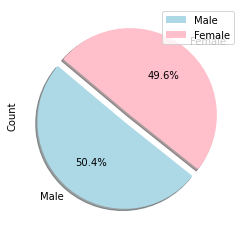

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

shortened_chart = mouse_df.drop_duplicates(['Mouse ID'], keep='last')

gender_count = shortened_chart.groupby(['Sex']).count()

#create variables
sex = ['Male', 'Female']
count = [125, 123]
labels = ['Male', 'Female']
explode = (0.1, 0)
colors = ('lightblue', 'pink')

#create DataFrame
gender_df = pd.DataFrame({'Sex':sex, 'Count': count})

# create plot
gender_df.plot(kind='pie', y='Count', explode=explode, labels=labels, colors=colors, 
                      autopct="%1.1f%%", shadow=True, startangle=140)

# show plot
plt.show()

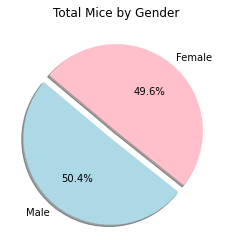

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mouse_df.groupby(['Sex']).count()

#gender_count shows m: 958, f: 922

#set variables for pie chart
counts = [125, 123]
labels = ['Male', 'Female']
explode = (0.1, 0)
colors = ('lightblue', 'pink')


# create plot
gender_plot = plt.pie(counts, explode=explode, labels=labels, colors=colors, 
                      autopct="%1.1f%%", shadow=True, startangle=140)

# label plot
plt.title('Total Mice by Gender')

# show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = mouse_df.sort_values(['Mouse ID','Timepoint'])
sorted_df = sorted_df.drop_duplicates(['Mouse ID'], keep='last')
regimen_df = sorted_df[sorted_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
regimen_df = regimen_df.sort_values('Mouse ID')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

#set counter to print results
table_set=0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol=regimen_df.loc[regimen_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_list.append(tumor_vol)
    
    # calculate quartiles, bounds, and outliers
    quartiles = tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # print statements
    if table_set == 0:
        print(f'--------------------------------------------------------')
    print(f'IQR data for {drug}  is:')
    print(f'The lower quartile of {drug} is: {lowerq}')
    print(f'The upper quartile of {drug} is: {upperq}')
    print(f'The interquartile range of {drug} is: {iqr}')
    print(f'The the median of {drug} is: {quartiles[0.5]}' )
    print(f'Values below {lower_bound} for {drug} could be outliers.')
    print(f'Values above {upper_bound} for {drug} could be outliers.')
    print(f'--------------------------------------------------------')
    
    table_set += 1

--------------------------------------------------------
IQR data for Capomulin  is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
IQR data for Ramicane  is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
IQR data for Infubinol  is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17
Values below 36.83 for Infubinol could b

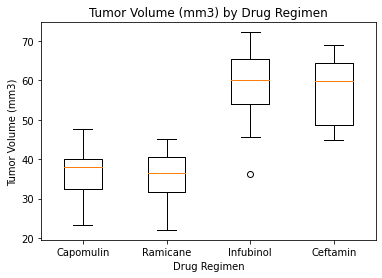

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.set_title('Tumor Volume (mm3) by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol_list)
plt.xticks([1,2,3,4], treatment_list)

# show plot
plt.show()

## Line and Scatter Plots

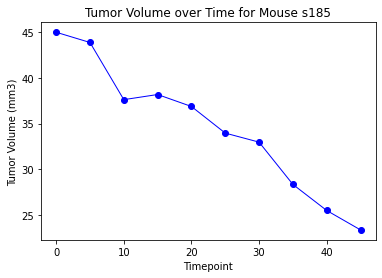

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select a mouse treated with Capomulin by using loc to filter on Drug Regimen and showing results
capomulin=mouse_df.loc[mouse_df['Drug Regimen']=='Capomulin']
#selecting mouse s185 as identified in the last dataframe

cp_mouse = capomulin[capomulin['Mouse ID']=='s185']

# create line plot

x_axis = cp_mouse['Timepoint']
y_axis = cp_mouse['Tumor Volume (mm3)']
plt.title('Tumor Volume over Time for Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)

# show plot
plt.show()

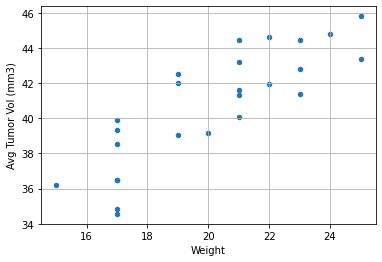

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get figures for new dataframe
mouse_capomulin = capomulin.groupby(['Mouse ID'])
weight = mouse_capomulin[('Weight (g)')].mean()
tumor_mean = round(mouse_capomulin[('Tumor Volume (mm3)')].mean(),2)

# new dataframe for scatterplot
weight_df = pd.DataFrame({'Weight': weight, 'Avg Tumor Vol (mm3)': tumor_mean})

# write plot
weight_plot = weight_df.plot(kind='scatter', x='Weight', y='Avg Tumor Vol (mm3)', grid=True)

# show plot
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# find correlation
correlation = st.pearsonr(weight_df['Weight'],weight_df['Avg Tumor Vol (mm3)'])

# print result
print(f'The correlation between the weight and average tumor volume is {round(correlation[0], 2)}')

The correlation between the weight and average tumor volume is 0.84


r-squared is: 0.84
regression line equation is: y = 0.95x + 21.56


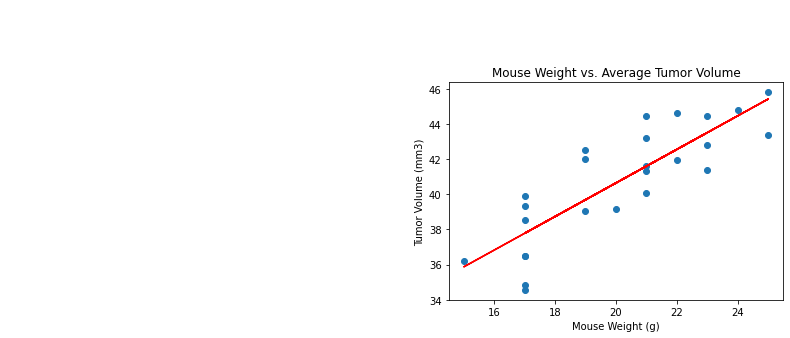

In [18]:
# linear regression
x_values = weight_df['Weight']
y_values = weight_df['Avg Tumor Vol (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# label plot
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


#print values
print(f'r-squared is: {round(rvalue, 2)}')
print(f'regression line equation is: {line_eq}')
